<p style="text-align:center;">
<img src="https://github.com/digital-futures-academy/DataScienceMasterResources/blob/main/Resources/datascience-notebook-header.png?raw=true"
     alt="DigitalFuturesLogo"
     style="float: center; margin-right: 10px;" />
</p>

<p style="text-align:center;">
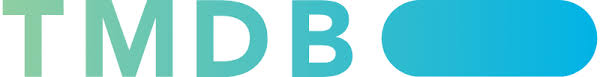
</p>

# TMDB Movie Review

In this presentation we will be looking at an in dept analysis of movies and genres from the *__TMDB_movies.csv__* dataset.

We first start with importing all the relevant libraries and files.
### Import Library/files

In [1]:
#importing relevant libraries
import numpy as np  # numpy!
import seaborn as sns # visualisation!
import matplotlib.pyplot as plt # visualisation!
import pandas as pd # dataframes & data analysis!

#importing files into dataframes
genre_ = "https://raw.githubusercontent.com/Diiamon/Tmdb_review_DF/main/tmdb_genres.csv"
tmdb = pd.read_csv('TMDB_movies.csv')
tmbd_genre = pd.read_csv(genre_)

## File Review

The __TMDB_movies.csv__ has now been put into the dataframe __tmdb__ .

In __tmdb__ these columns had rows in a json format :

- genres
- keywords
- production_companies
- production_countries
- spoken_languages

The *genres* column was chosen for the analysis while the other columns were dropped as the json format were not useful .

Creating a new table called __tmdb_n__ .

This column was extracted using excel and then joined with the __tmdb__ to make a new table called __tmdb_n_genre__ . 

### Making tmdb_n_genre Table

In [2]:
#creating a new table without the columns with json formattin
tmdb_n = tmdb[['id','title', 'budget', 'original_language', 'original_title', 'popularity', 'release_date', 'revenue', 'runtime', 'status', 'tagline', 'vote_average', 'vote_count']]

#creating a new table with genre and the non-json columns
tmdb_n_genre = tmdb_n.join(tmbd_genre.set_index(["id"]), on=["id"])

## Null Review

In the __tmdb_n__ table there are a few nulls, that have been kept in.

These are the reasons why :

| column | No of Nulls | Reson For Ignoring |
| ----------- | ----------- | ----------- |
| __release_date__ | 1 | This will not afect analysis as it is just 1 |
| __runtime__ | 2 | This will not afect analysis as it is just 2 |
| __tagline__ | 844 | Tagline for a movie is not a requirement |

### Finding Nulls

In [3]:
tmdb_n.isnull().sum() #Finding the sum of nulls in the table

id                     0
title                  0
budget                 0
original_language      0
original_title         0
popularity             0
release_date           1
revenue                0
runtime                2
status                 0
tagline              844
vote_average           0
vote_count             0
dtype: int64

## Average Budget and Revenue by Genres

Now we will be looking at the *average budget* and *average revenue* by *genre* .

Which will then be put into barplots and we can take a look at the performance of each *genre* .

### Budget and Revenue Averages by Genres

In [4]:
#creating budget and revenue averages by genres

budget_genre = tmdb_n_genre.groupby('genre_name')[['budget']].mean()
revenue_genre = tmdb_n_genre.groupby('genre_name')[['revenue']].mean()

revenue_genre.reset_index(inplace=True)
budget_genre.reset_index(inplace=True)

### Plots Showing the Average Budget and Revenue by Genres

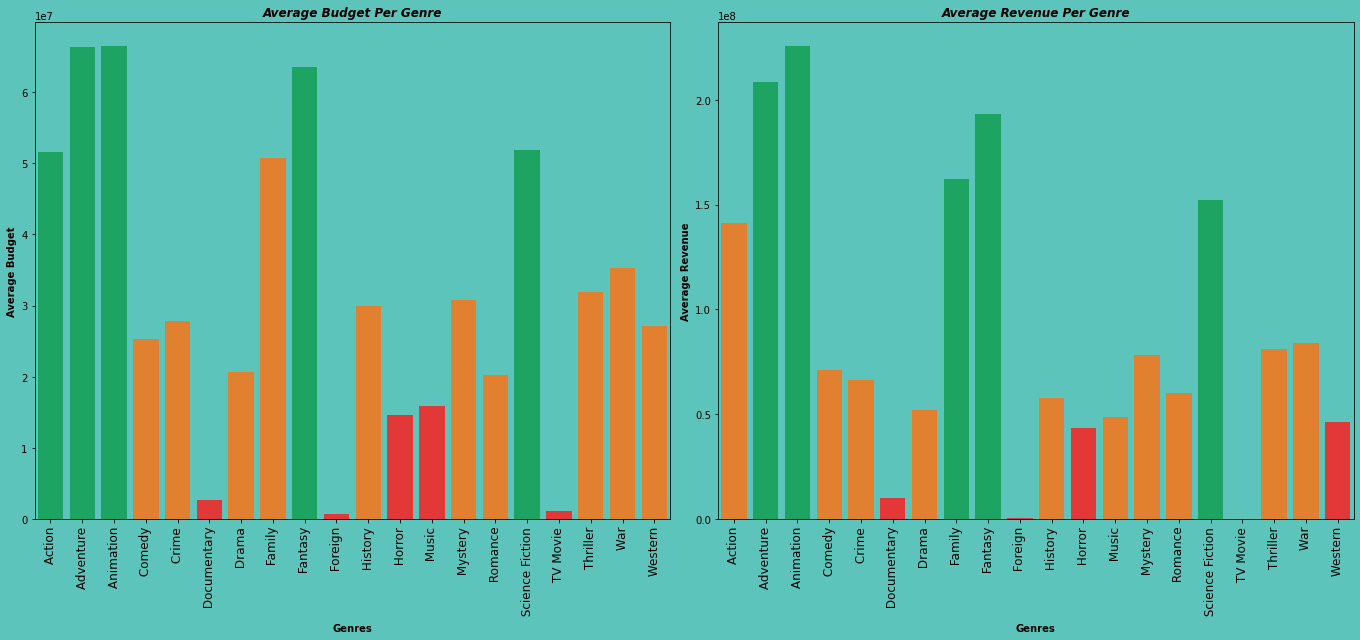

In [5]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(19, 9))

#budget plot
height_color_budget = [{h<budget_genre['budget'].quantile(0.25): '#FF1B1C', 
                 budget_genre['budget'].quantile(0.25)<=h<=budget_genre['budget'].quantile(0.75): '#FF7F11', 
                 h>budget_genre['budget'].quantile(0.75): '#06BA63'}[True] for h in budget_genre['budget']]

sns.barplot(data = budget_genre,
            x = 'genre_name',
           y = 'budget',
           palette = height_color_budget,
           ax=axes[0])
#title formatting
axes[0].set_title('Average Budget Per Genre',
                 fontweight='bold', 
                  style='italic')
#x-axis formatting
axes[0].tick_params(axis='x',
                 labelsize ='large', 
                    rotation=90)
#x-label formatting
axes[0].set_xlabel('Genres',
                  fontweight = 'bold')

axes[0].set_ylabel('Average Budget',
                  fontweight = 'bold')

#change axis plot background colour
axes[0].patch.set_facecolor('#5CC4BB')

#revenue plot
height_color_revenue = [{h<revenue_genre['revenue'].quantile(0.25): '#FF1B1C', 
                 revenue_genre['revenue'].quantile(0.25)<=h<=revenue_genre['revenue'].quantile(0.75): '#FF7F11', 
                 h>revenue_genre['revenue'].quantile(0.75): '#06BA63'}[True] for h in revenue_genre['revenue']]

sns.barplot(data = revenue_genre,
            x = 'genre_name',
           y = 'revenue',
           palette = height_color_revenue,
           ax=axes[1])
#title formatting
axes[1].set_title('Average Revenue Per Genre',
                 fontweight='bold', 
                  style='italic')
#x-axis formatting
axes[1].tick_params(axis='x', 
                    rotation=90,
                 labelsize ='large')
#x-axis label formatting
axes[1].set_xlabel('Genres',
          fontweight = 'bold')

#y-axis label formatting
axes[1].set_ylabel('Average Revenue',
          fontweight = 'bold')

#change axis plot background colour
axes[1].patch.set_facecolor('#5CC4BB')

#change background colour
fig.patch.set_facecolor('#5CC4BB')
##D9E5D6
# Adjust layout to prevent overlap
plt.tight_layout()

#show plot
plt.show()

## Plot Analysis

- All genres are producing a higher average revenue than their budget .
- __Action__, __Adventure__ and __Animation__ have the highest average budgets __Action__ does not follow the same trend in revenue as it's other high budget genres .

With this in mind, we will be looking more in depth at these 3 genres .

## Action, Adventure, Animation Movie Analysis

Using the __tmdb_n_genre__ table we will be creating 3 new tables for __Action__, __Adventure__ and __Animation__ .

<u>Contents of the table</u>

| Table name | content |
| ----------- | ----------- |
| __action__ | Top 10 movie titles by revenue |
| __adventure__ | Top 10 movie titles by revenue | 
| __animation__ | Top 10 movie titles by revenue |

### Action, Adventure, Animation Table Creation

In [6]:
tmdb_n_genre_action = tmdb_n_genre.loc[tmdb_n_genre['genre_name'] == ' Action', : ]
tmdb_n_genre_adv = tmdb_n_genre.loc[tmdb_n_genre['genre_name'] == ' Adventure', : ]
tmdb_n_genre_ani = tmdb_n_genre.loc[tmdb_n_genre['genre_name'] == ' Animation', : ]

action = tmdb_n_genre_action.sort_values(by = 'revenue', ascending = False).head(10)
adventure = tmdb_n_genre_adv.sort_values(by = 'revenue', ascending = False).head(10)
animation = tmdb_n_genre_ani.sort_values(by = 'revenue', ascending = False).head(10)

### Plots Showing the Top 10 Movies By Revenue For Action, Adventure, Animation

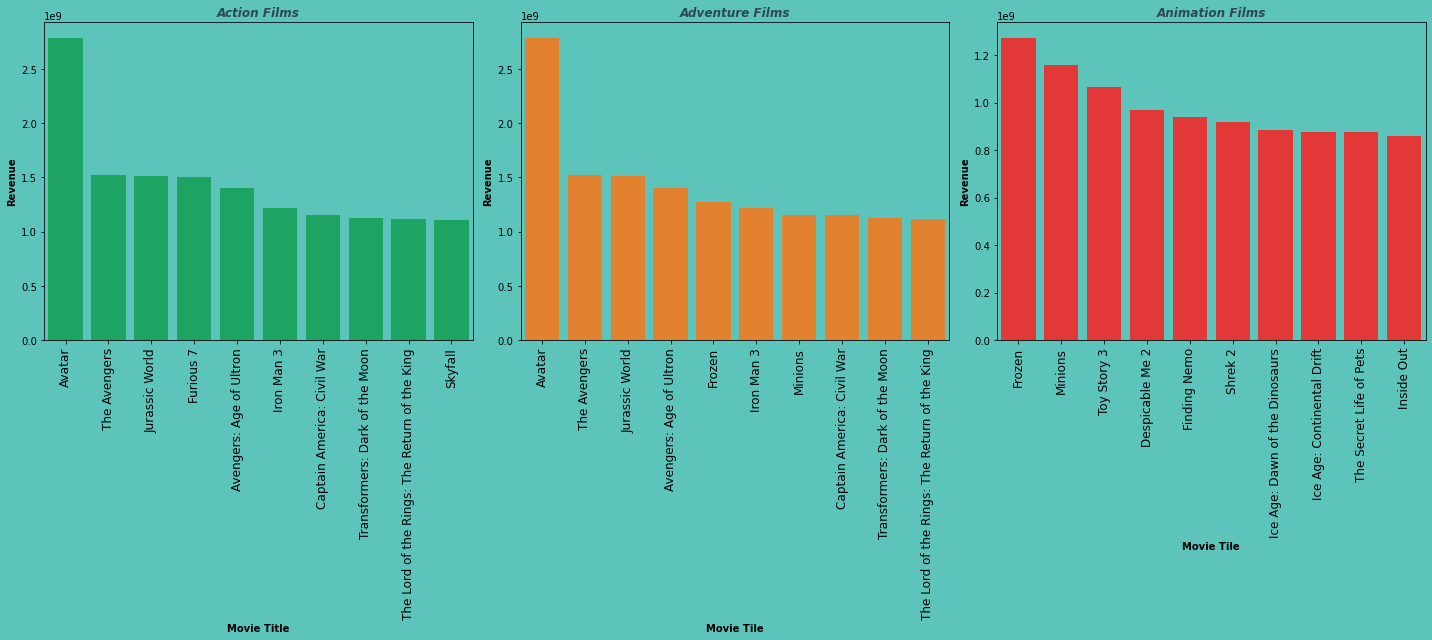

In [7]:
# Create a figure with three subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(20, 9))

#action plot
sns.barplot(data = action,
            x = 'title',
           y = 'revenue',
           color = '#06BA63',
           ax=axes[0])
#Title formatting
axes[0].set_title('Action Films',
                 fontweight='bold', 
                  style='italic',
                 color = '#2F4858')
#x-axis formating
axes[0].tick_params(axis='x', 
                    rotation=90,
                   labelsize = 'large')
#x-axis label formatting
axes[0].set_xlabel('Movie Title',
                  fontweight = 'bold')
#y-axis label formatting
axes[0].set_ylabel('Revenue',
                  fontweight = 'bold')

#change axis plot background colour
axes[0].patch.set_facecolor('#5CC4BB')

#adventure plot
sns.barplot(data = adventure,
            x = 'title',
           y = 'revenue',
           color = '#FF7F11',
           ax=axes[1])
#Title formatting
axes[1].set_title('Adventure Films',
                 fontweight='bold', 
                  style='italic',
                 color = '#2F4858')
#x-axis formating
axes[1].tick_params(axis='x', 
                    rotation=90,
                   labelsize = 'large')
#x-axis label formatting
axes[1].set_xlabel('Movie Tile',
                  fontweight = 'bold')
#y-axis label formatting
axes[1].set_ylabel('Revenue',
                  fontweight = 'bold')

#change axis plot background colour
axes[1].patch.set_facecolor('#5CC4BB')

#animation plot
sns.barplot(data = animation,
            x = 'title',
           y = 'revenue',
           color = '#FF1B1C',
           ax=axes[2])
#Title formatting
axes[2].set_title('Animation Films',
                 fontweight='bold', 
                  style='italic',
                 color = '#2F4858')
#x-axis label formatting
axes[2].tick_params(axis='x', 
                    rotation=90,
                   labelsize = 'large')
#x-axis label formatting
axes[2].set_xlabel('Movie Tile',
                  fontweight = 'bold')
#y-axis label formatting
axes[2].set_ylabel('Revenue',
                  fontweight = 'bold')

#change axis plot background colour
axes[2].patch.set_facecolor('#5CC4BB')

#change background colour
fig.patch.set_facecolor('#5CC4BB')

# Adjust layout to prevent overlap
plt.tight_layout()

#show plot
plt.show()

## Plot Analysis

From these charts 5 movie titles have been selected for futher analysis . 

These are the titles and why :

| Movie Title | Reason For Analysis |
| ----------- | ----------- |
| __Avatar__ <img src ="https://1000logos.net/wp-content/uploads/2022/11/Avatar-Logo.png" alt="Icon" width="32" height="32" />| Why did it do so well in Revenue ? |
| __Furious 7__ <img src ="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Furious-7-logo.png/1280px-Furious-7-logo.png" alt="Icon" width="32" height="32" />| Only movie with just Action to have a higher revenue than Action & Adventure movies. |
| __Avengers: Age of Ultron__ <img src ="https://p1.hiclipart.com/preview/743/354/454/avengers-age-of-ultron-logo-avengers-logo-png-clipart.jpg" alt="Icon" width="32" height="32" />| Why did __Furious 7__ outperform in Revenue ? |
| __Frozen__ <img src ="https://logowik.com/content/uploads/images/disney-frozen5605.logowik.com.webp" alt="Icon" width="32" height="32" />| Top Animation movie to have a higher revenue than an  Action & Adventure movie. | 
| __Iron Man 3__ <img src ="https://upload.wikimedia.org/wikipedia/commons/thumb/0/04/Iron_Man_3_Logo.png/1200px-Iron_Man_3_Logo.png" alt="Icon" width="32" height="32" />| Why did __Frozen__ outperform in Revenue ? |

With these questions in mind we now create a table with these 5 movie title lookinf at these column metrics .

- popularity
- runtime
- vote_average
- vote_count

### New Table With Chosen Movie Tite And Column Metrics

In [8]:
#creating a new table using the original tmdb dataframe
tmdb_tr = tmdb[['title', 'popularity', 'runtime', 'vote_average', 'vote_count']]

#Getting only the chosen movie title for analysis
tmdb_trs = tmdb_tr.loc[(tmdb_tr['title'] == 'Avatar') | 
                       (tmdb_tr['title'] == 'Furious 7') | 
                       (tmdb_tr['title'] == 'Avengers: Age of Ultron') | 
                       (tmdb_tr['title'] == 'Frozen') | 
                       (tmdb_tr['title'] == 'Iron Man 3'), : ]

### Plots Showing The Comparision Of The Movies

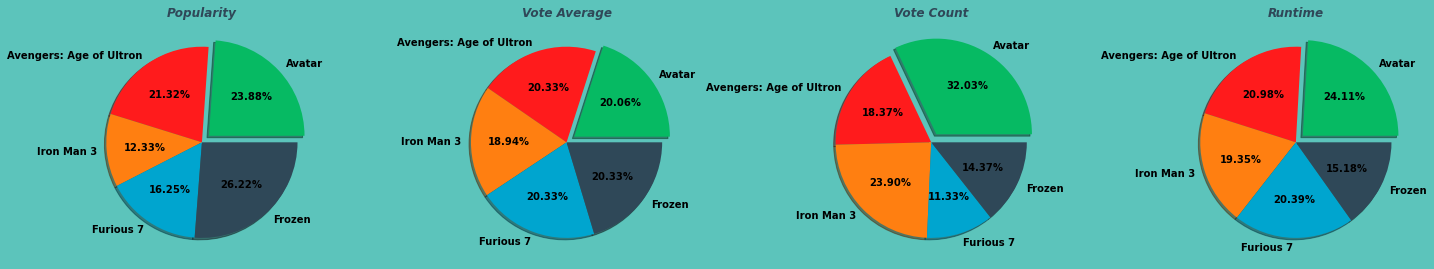

In [9]:
# Create a figure with 4 subplots side by side
fig, axes = plt.subplots(1, 4, figsize=(20, 15))

#Popularity plot
axes[0].pie(tmdb_trs['popularity'], 
        labels = tmdb_trs['title'],
       autopct = '%1.2f%%',
       explode = [0.1, 0, 0, 0, 0],
        colors = ['#06BA63','#FF1B1C','#FF7F11','#00A5CF', '#2F4858'],
        shadow = True,
        textprops={'color': 'black', 'fontweight': 'bold'})
#title formatting
axes[0].set_title('Popularity',
                 fontweight='bold', 
                  style='italic',
                 color = '#2F4858')

#vote_average plot
axes[1].pie(tmdb_trs['vote_average'], 
        labels = tmdb_trs['title'],
       autopct = '%1.2f%%',
       explode = [0.1, 0, 0, 0, 0],
        colors = ['#06BA63','#FF1B1C','#FF7F11','#00A5CF', '#2F4858'],
           shadow = True,
           textprops={'color': 'black', 'fontweight': 'bold'})
#title formatting
axes[1].set_title('Vote Average',
                 fontweight='bold', 
                  style='italic',
                 color = '#2F4858')

#vote_count plot
axes[2].pie(tmdb_trs['vote_count'], 
        labels = tmdb_trs['title'],
       autopct = '%1.2f%%',
       explode = [0.1, 0, 0, 0, 0],
        colors = ['#06BA63','#FF1B1C','#FF7F11','#00A5CF', '#2F4858'],
           shadow = True,
           textprops={'color': 'black', 'fontweight': 'bold'})
#title formatting
axes[2].set_title('Vote Count',
                 fontweight='bold', 
                  style='italic',
                 color = '#2F4858')

#runtime plot
axes[3].pie(tmdb_trs['runtime'], 
        labels = tmdb_trs['title'],
       autopct = '%1.2f%%',
       explode = [0.1, 0, 0, 0, 0],
        colors = ['#06BA63','#FF1B1C','#FF7F11','#00A5CF', '#2F4858'],
           shadow = True,
           textprops={'color': 'black', 'fontweight': 'bold'})
#title formatting
axes[3].set_title('Runtime',
                 fontweight='bold', 
                  style='italic',
                 color = '#2F4858')

fig.patch.set_facecolor('#5CC4BB')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Plot Analysis

<u>Assumptions</u>

- Popularity is based on movie attendance
- Vote count/ Vote Average is based on voting data from the website
- Runtime is the length of the movie
- People who watched the movie might not have voted on the app
- People who voted on the app have watched the movie

<u>Analysis</u>

| Movie Title | __Analysis__ | __Conclusion__ |
| ----------- | ----------- | ----------- |
| __Avatar__ <img src ="https://1000logos.net/wp-content/uploads/2022/11/Avatar-Logo.png" alt="Icon" width="32" height="32" /> | __Avatar__ had the 2nd highest porportion of popularity but highest porportion of vote count | With high popularity and votes shows high interest |
| __Frozen__ <img src ="https://logowik.com/content/uploads/images/disney-frozen5605.logowik.com.webp" alt="Icon" width="32" height="32" />| __Frozen__ had higher porportion of popularity than __Iron Man 3__ <img src ="https://upload.wikimedia.org/wikipedia/commons/thumb/0/04/Iron_Man_3_Logo.png/1200px-Iron_Man_3_Logo.png" alt="Icon" width="32" height="32" /> but not in vote count | With a higher difference in Popularity than vote count, __Frozen__ has higher interest |
| __Furious 7__ <img src ="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Furious-7-logo.png/1280px-Furious-7-logo.png" alt="Icon" width="32" height="32" />| __Furious 7__ had lower porportion of popularity, vote count and a shorter film than __Avengers: Age of Ultron__ <img src ="https://p1.hiclipart.com/preview/743/354/454/avengers-age-of-ultron-logo-avengers-logo-png-clipart.jpg" alt="Icon" width="32" height="32" /> | *(More Analysis needed)* |


## Refrences

- All images and icons were taken from the internet except *Digital Futures logo*
- *Digital Futures Logo* is from Digitial Futres
- Customisation for the graphs were taken from the seaborn documentation